# Modern Control Systems - Chapter 2 Examples

This notebook contains Python implementations of MATLAB examples from Chapter 2.

## FIGURE 2.45: Spring-Mass-Damper System Analysis

Script to analyze the unforced response of a spring-mass-damper system to an initial condition.

### System Parameters
- Initial displacement: $y_0 = 0.15$ m
- Natural frequency: $\omega_n = \sqrt{2}$ rad/s
- Damping ratio: $\zeta = \frac{1}{2\sqrt{2}}$

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp

# Set matplotlib style for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['grid.alpha'] = 0.3

## Define System Parameters

In [3]:
# System parameters
y0 = 0.15  # Initial displacement (m)
wn = np.sqrt(2)  # Natural frequency (rad/s)
zeta = 1 / (2 * np.sqrt(2))  # Damping ratio
t = np.arange(0, 10.1, 0.1)  # Time vector (s)

print(f"Natural frequency (ωn): {wn:.4f} rad/s")
print(f"Damping ratio (ζ): {zeta:.4f}")

if zeta < 1:
    print(f"System is underdamped (ζ < 1)")
elif zeta > 1:
    print(f"System is not underdamped (ζ > 1)")
else:
    print(f"System is critically damped (ζ = 1)")

Natural frequency (ωn): 1.4142 rad/s
Damping ratio (ζ): 0.3536
System is underdamped (ζ < 1)


## Compute Unforced Response

For an underdamped system ($\zeta < 1$), the response to an initial displacement is:

$$y(t) = c \cdot e^{-\zeta \omega_n t} \sin(\omega_d t + \phi)$$

where:
- $c = \frac{y_0}{\sqrt{1-\zeta^2}}$ is the amplitude coefficient
- $\omega_d = \omega_n\sqrt{1-\zeta^2}$ is the damped natural frequency
- $\phi = \arccos(\zeta)$ is the phase angle

In [4]:
# Compute unforced response
c = y0 / np.sqrt(1 - zeta**2)  # Amplitude coefficient
omega_d = wn * np.sqrt(1 - zeta**2)  # Damped natural frequency
phi = np.arccos(zeta)  # Phase angle

# Response equation
y = c * np.exp(-zeta * wn * t) * np.sin(omega_d * t + phi)

# Envelope boundaries (exponential decay)
bu = c * np.exp(-zeta * wn * t)  # Upper bound
bl = -bu  # Lower bound

print(f"Amplitude coefficient (c): {c:.4f} m")
print(f"Damped natural frequency (ωd): {omega_d:.4f} rad/s")
print(f"Phase angle (φ): {phi:.4f} rad ({np.degrees(phi):.2f}°)")

Amplitude coefficient (c): 0.1604 m
Damped natural frequency (ωd): 1.3229 rad/s
Phase angle (φ): 1.2094 rad (69.30°)


## Plot the Response

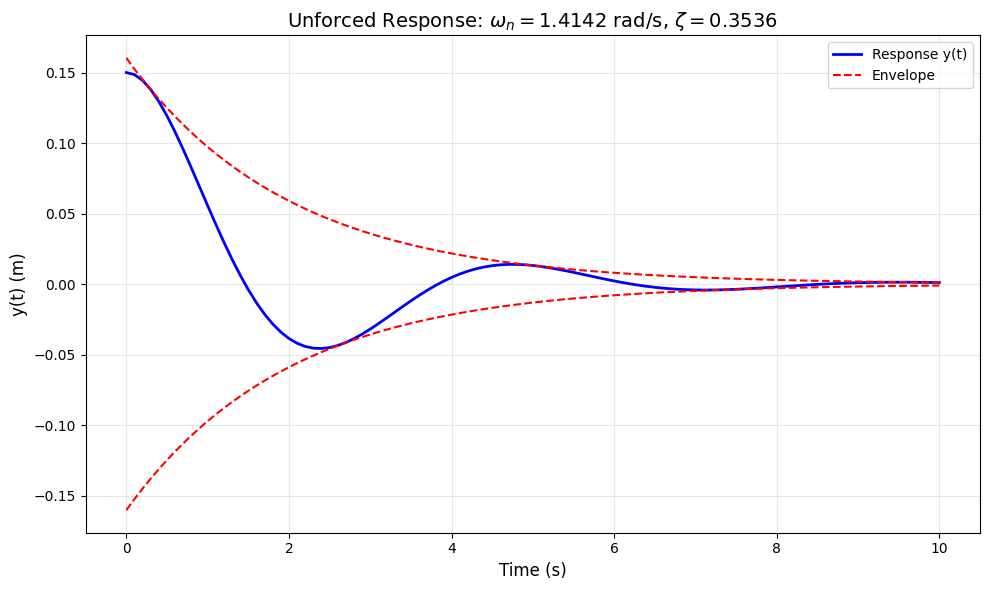

In [5]:
# Plot the response with envelope
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'b-', linewidth=2, label='Response y(t)')
plt.plot(t, bu, 'r--', linewidth=1.5, label='Envelope')
plt.plot(t, bl, 'r--', linewidth=1.5)
plt.grid(True, alpha=0.3)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('y(t) (m)', fontsize=12)
plt.title(f'Unforced Response: $\\omega_n={wn:.4f}$ rad/s, $\\zeta={zeta:.4f}$', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

## FIGURE 2.47: Polynomial Roots and Coefficients

Entering the polynomial $p(s) = s^3 + 3s^2 + 4$ and calculating its roots.

In [6]:
# Define polynomial coefficients: p(s) = s³ + 3s² + 0s + 4
p = [1, 3, 0, 4]

# Find roots of the polynomial
r = np.roots(p)

print("Polynomial coefficients:", p)
print(f"Polynomial: s³ + 3s² + 4")
print("\nRoots of the polynomial:")
for i, root in enumerate(r, 1):
    if np.isreal(root):
        print(f"  r{i} = {root.real:.4f}")
    else:
        print(f"  r{i} = {root.real:.4f} {root.imag:+.4f}i")

Polynomial coefficients: [1, 3, 0, 4]
Polynomial: s³ + 3s² + 4

Roots of the polynomial:
  r1 = -3.3553
  r2 = 0.1777 +1.0773i
  r3 = 0.1777 -1.0773i


In [7]:
# Reconstruct polynomial from roots
p_reconstructed = np.poly(r)

print("Reconstructed polynomial coefficients:")
print(p_reconstructed)
print("\nVerification - coefficients match:", np.allclose(p, p_reconstructed))

Reconstructed polynomial coefficients:
[ 1.0000000e+00  3.0000000e+00 -8.8817842e-16  4.0000000e+00]

Verification - coefficients match: True


## FIGURE 2.48: Polynomial Multiplication and Evaluation

Using convolution and polynomial evaluation to multiply and evaluate polynomials.

Example: $(3s^2 + 2s + 1)(s + 4)$

In [8]:
# Define two polynomials
p = [3, 2, 1]  # 3s² + 2s + 1
q = [1, 4]     # s + 4

# Multiply polynomials using convolution
# In MATLAB: conv(p, q)
n = np.convolve(p, q)

print("Polynomial p(s) = 3s² + 2s + 1 →", p)
print("Polynomial q(s) = s + 4 →", q)
print("\nProduct n(s) = p(s) × q(s):")
print("Coefficients:", n)
print("n(s) = 3s³ + 14s² + 9s + 4")

Polynomial p(s) = 3s² + 2s + 1 → [3, 2, 1]
Polynomial q(s) = s + 4 → [1, 4]

Product n(s) = p(s) × q(s):
Coefficients: [ 3 14  9  4]
n(s) = 3s³ + 14s² + 9s + 4


In [9]:
# Evaluate polynomial at s = -5
# In MATLAB: polyval(n, -5)
value = np.polyval(n, -5)

print(f"\nEvaluating n(s) at s = -5:")
print(f"n(-5) = 3(-5)³ + 14(-5)² + 9(-5) + 4")
print(f"n(-5) = {value}")


Evaluating n(s) at s = -5:
n(-5) = 3(-5)³ + 14(-5)² + 9(-5) + 4
n(-5) = -66


## FIGURE 2.49: Transfer Functions and Operations

Using the `control` library to create transfer function objects and perform operations.

We'll add two transfer functions:
$$G_1(s) = \frac{10}{s^2 + 2s + 5}$$

$$G_2(s) = \frac{1}{s + 1}$$

In [10]:
# Import control library
import control as ct

# Create first transfer function: 10 / (s² + 2s + 5)
num1 = [10]
den1 = [1, 2, 5]
sys1 = ct.tf(num1, den1)

print(sys1)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       10
  -------------
  s^2 + 2 s + 5


In [11]:
# Create second transfer function: 1 / (s + 1)
num2 = [1]
den2 = [1, 1]
sys2 = ct.tf(num2, den2)

print(sys2)
print()

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1



In [12]:
# Add the two transfer functions
sys = sys1 + sys2

print("Sum of transfer functions sys = sys1 + sys2:")
print(sys)

Sum of transfer functions sys = sys1 + sys2:
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     s^2 + 12 s + 15
  ---------------------
  s^3 + 3 s^2 + 7 s + 5


## FIGURE 2.50: Poles and Zeros of Transfer Functions

Using the `pole()` and `zero()` functions to compute pole and zero locations of a linear system.

For the system: $$G(s) = \frac{s + 10}{s^2 + 2s + 1}$$

In [13]:
# Create transfer function
sys = ct.tf([1, 10], [1, 2, 1])

print("Transfer function:")
print(sys)
print()

Transfer function:
<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     s + 10
  -------------
  s^2 + 2 s + 1



Poles of the transfer function: [-1.+0.j -1.+0.j]
Zeros of the transfer function: [-10.+0.j]


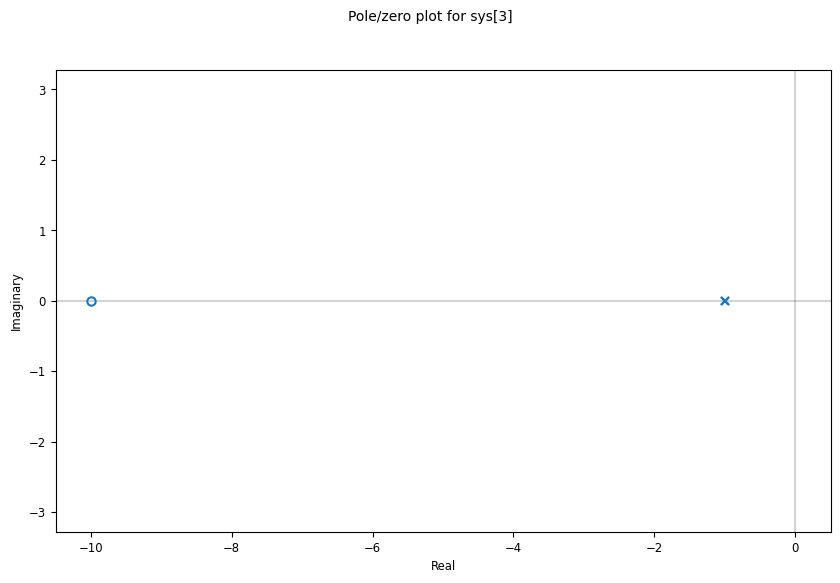

In [14]:
# Compute poles and zeros
pzmap = ct.pole_zero_map(sys)
poles = pzmap.poles
zeros = pzmap.zeros
print("Poles of the transfer function:", poles)
print("Zeros of the transfer function:", zeros)

pzmap.plot()